In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.name

if os.name == 'posix': 
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt':
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) 

%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import cv2
from glob import glob
from PIL import Image
import json
import seaborn as sns
import os
import pickle
import time
from tqdm import tqdm

import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook_connected" 

In [2]:
plt.rc('font', size=20)  
plt.rc('axes', labelsize=20)   
plt.rc('xtick', labelsize=50) 
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)  
plt.rc('figure', titlesize=50)

In [1]:
# 데이터 불러오기
import pandas as pd
dir_root = r'E:\관광'
df = pd.read_csv(dir_root + '/train.csv')
df_test = pd.read_csv(dir_root + '/test.csv')

In [9]:
print(df.info())
print(df.describe())
df.tail(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16986 entries, 0 to 16985
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        16986 non-null  object
 1   img_path  16986 non-null  object
 2   overview  16986 non-null  object
 3   cat1      16986 non-null  object
 4   cat2      16986 non-null  object
 5   cat3      16986 non-null  object
dtypes: object(6)
memory usage: 796.3+ KB
None
                 id                       img_path  \
count         16986                          16986   
unique        16986                          16986   
top     TRAIN_00000  ./image/train/TRAIN_00000.jpg   
freq              1                              1   

                                                 overview          cat1  \
count                                               16986         16986   
unique                                              16973             6   
top     청정지역 양산시 원동면 원리에 위치하고 있는 캠프라임은 약 6,60

id                       img_path  \
16983  TRAIN_16983  ./image/train/TRAIN_16983.jpg   
16984  TRAIN_16984  ./image/train/TRAIN_16984.jpg   
16985  TRAIN_16985  ./image/train/TRAIN_16985.jpg   

                                                overview          cat1  \
16983  충남 서산시 중심가에 위치한 줌모텔은 프라이버스가 보장되는 조용한 공간으로 가치가 ...            숙박   
16984  토토큰바위캠핑장은 경기도 가평지역 내에서도 청정지역으로 손꼽히는 지역으로 주변에 화...           레포츠   
16985  포천의 진산으로 불리우는 왕방산(王訪山)에는 천년의 역사를 간직하고 있는 왕산사(王...  인문(문화/예술/역사)   

         cat2       cat3  
16983    숙박시설         모텔  
16984  육상 레포츠  야영장,오토캠핑장  
16985   역사관광지         사찰

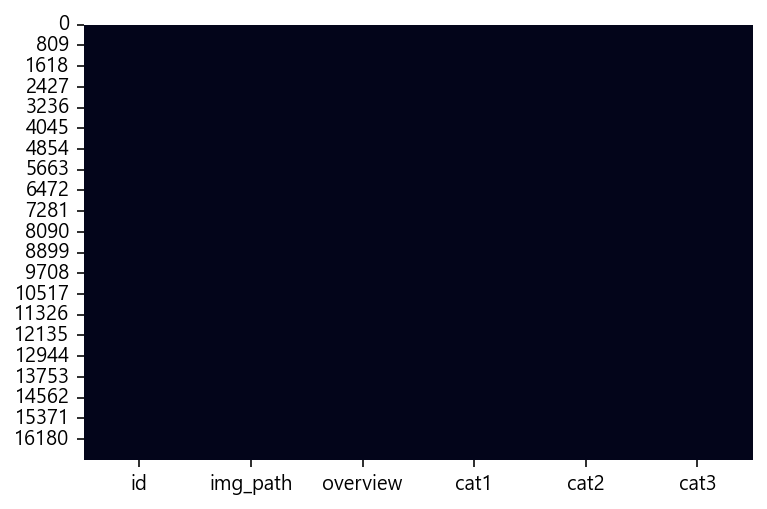

In [12]:
# 결측값 측정
sns.heatmap(df.isnull(), cbar=False)
plt.show()

C:\Users\master\AppData\Local\Temp\ipykernel_24412\1805780018.py:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



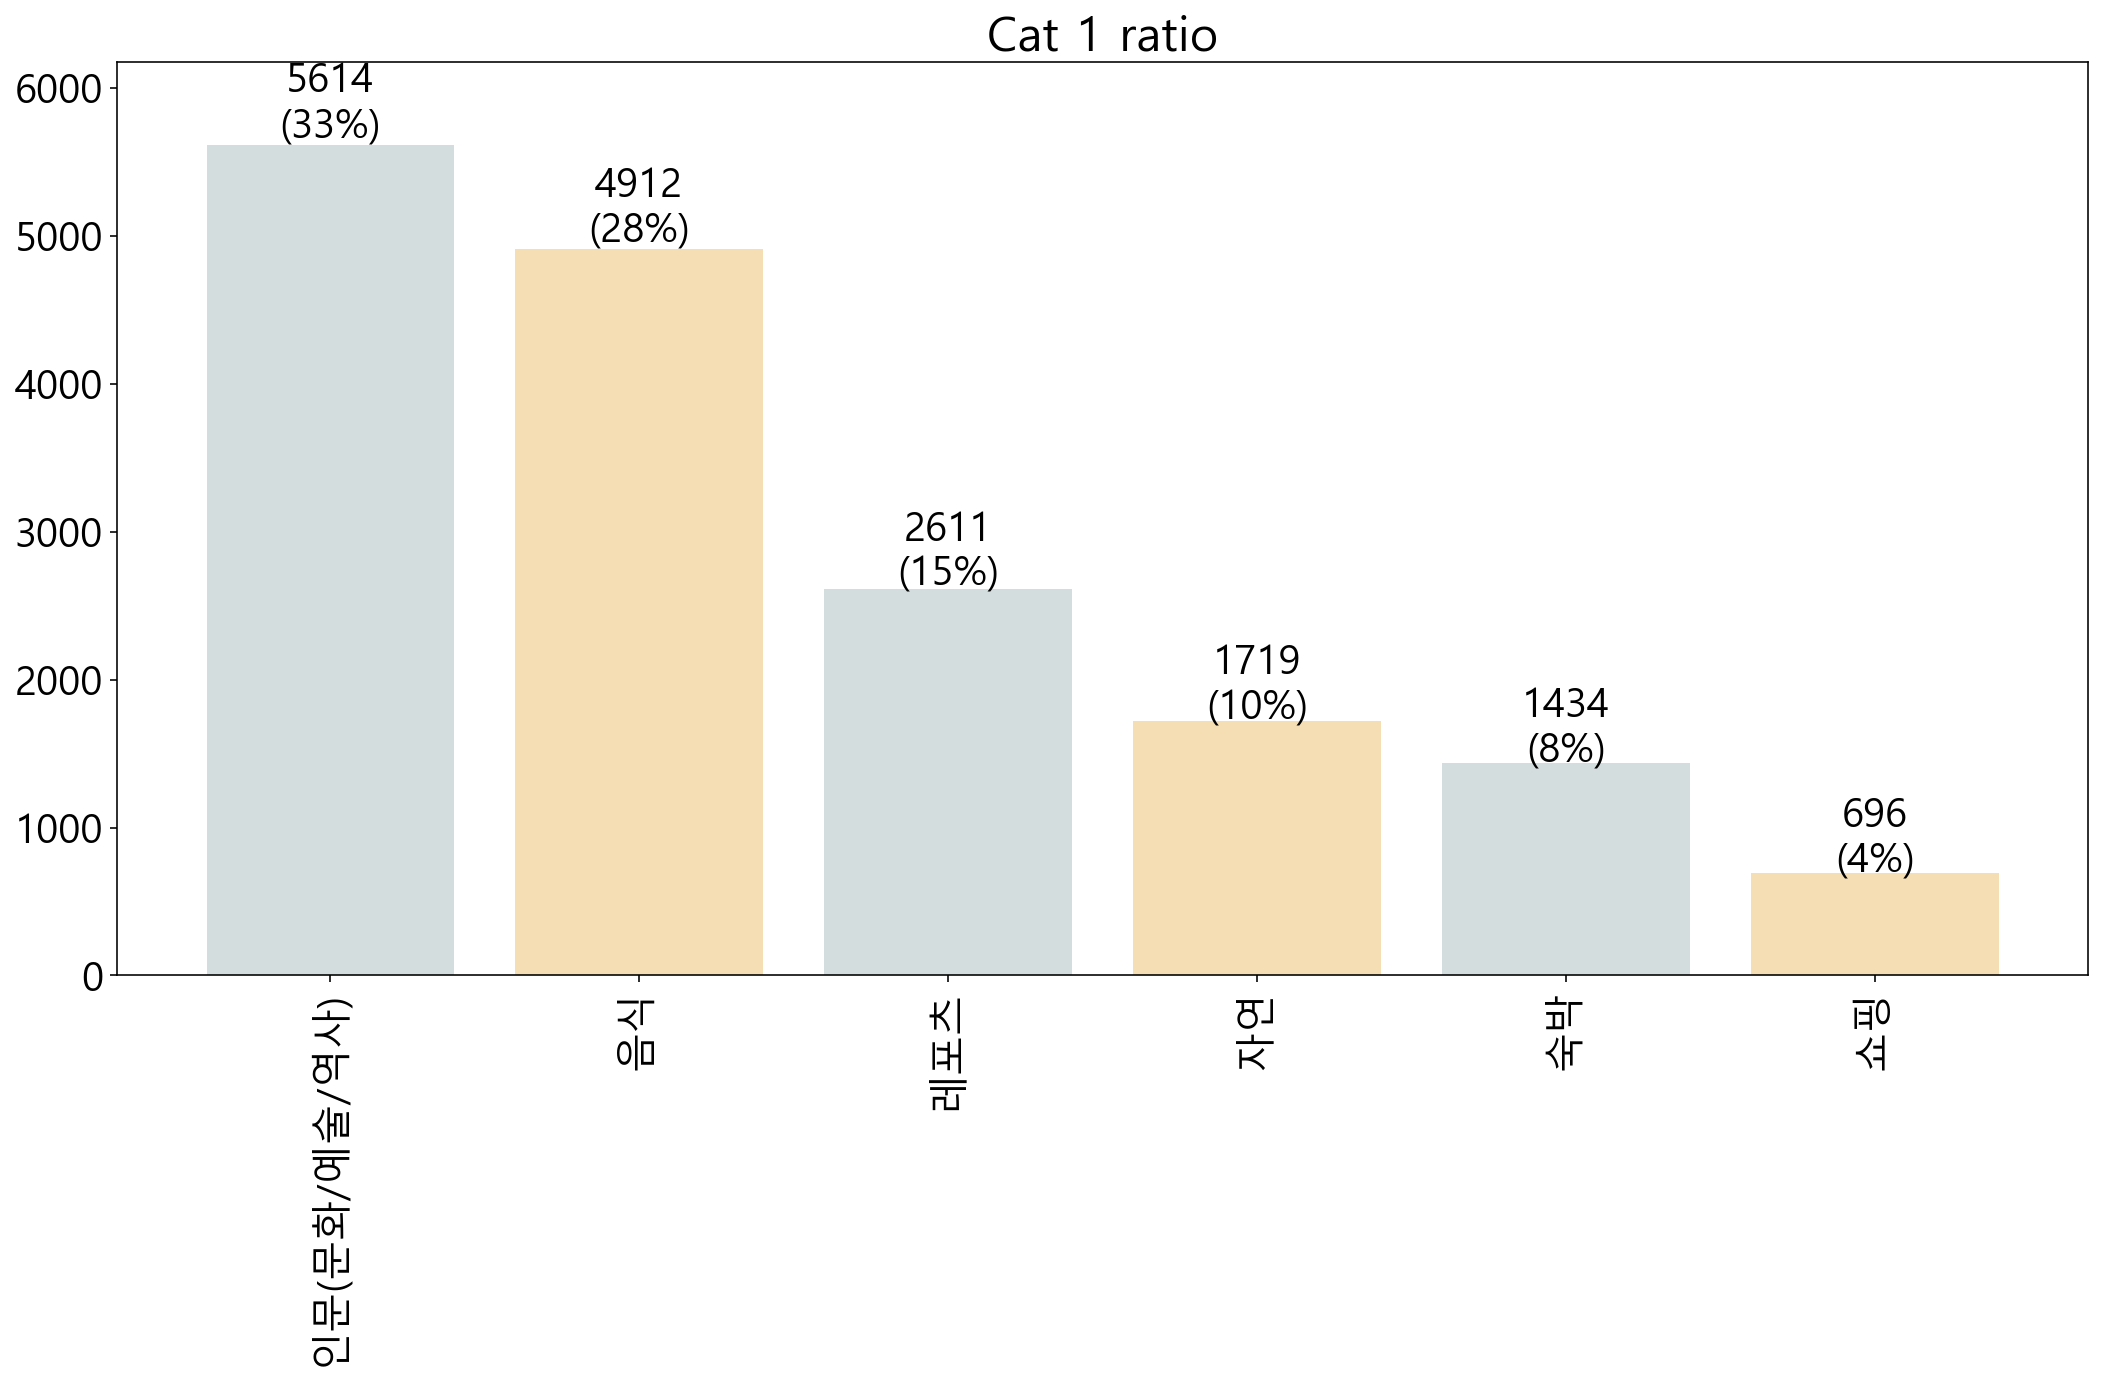

In [28]:
# cat1 분포 확인

f, axs = plt.subplots(1,figsize=(15,10))
object_cnt = df.cat1.value_counts().sort_values(ascending=False)
name_list = object_cnt.index.tolist()

axs.bar(name_list, object_cnt.values, color=['#d4dddd' if i%2==0 else '#F5DEB3' for i in range(len(name_list))])
for x,y,z in zip(range(len(name_list)), object_cnt.values,object_cnt.values/object_cnt.sum()*100):        
    axs.annotate('%d\n(%d%%)' %(int(y),z), xy=(x,y+0.01*y), textcoords='data', ha = 'center') 
axs.axis(ymin=0,ymax=int(max(object_cnt)*1.1))
axs.set_xticklabels(name_list, rotation = 90,fontsize = 20)
axs.set_title("Cat 1 ratio")
f.tight_layout()
plt.show()

C:\Users\master\AppData\Local\Temp\ipykernel_24412\981289182.py:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



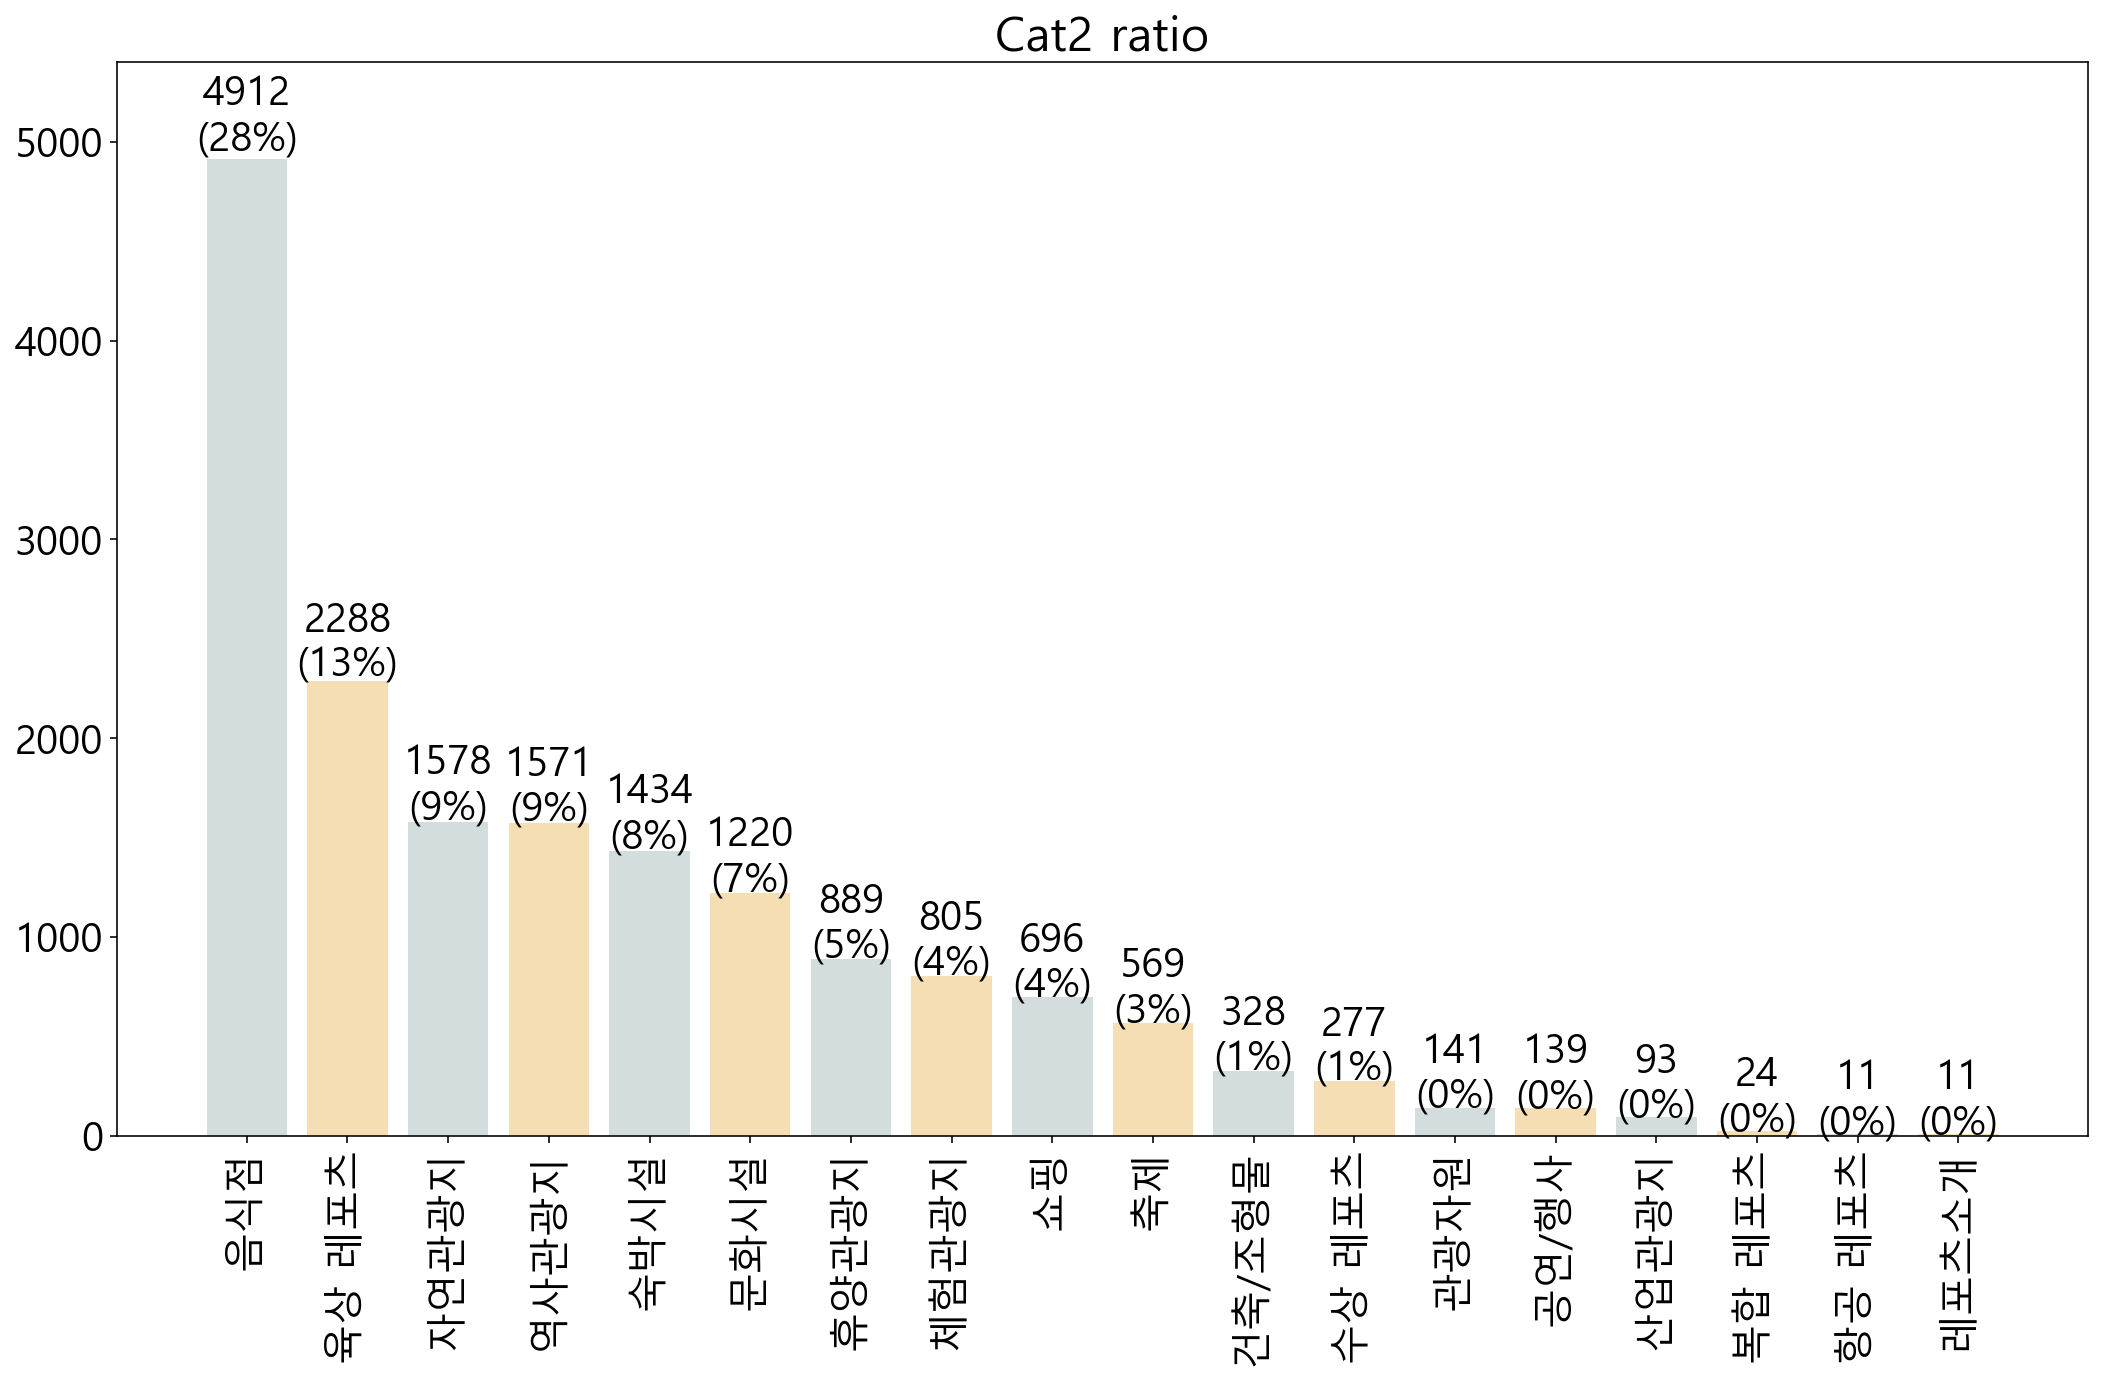

In [32]:
# cat2 분포 확인

f, axs = plt.subplots(1,figsize=(15,10))
object_cnt = df.cat2.value_counts().sort_values(ascending=False)
name_list = object_cnt.index.tolist()

axs.bar(name_list, object_cnt.values, color=['#d4dddd' if i%2==0 else '#F5DEB3' for i in range(len(name_list))])
for x,y,z in zip(range(len(name_list)), object_cnt.values,object_cnt.values/object_cnt.sum()*100):        
    axs.annotate('%d\n(%d%%)' %(int(y),z), xy=(x,y+0.01*y), textcoords='data', ha = 'center') 
axs.axis(ymin=0,ymax=int(max(object_cnt)*1.1))
axs.set_xticklabels(name_list, rotation = 90,fontsize = 20)
axs.set_title("Cat2 ratio")
f.tight_layout()
plt.show()

C:\Users\master\AppData\Local\Temp\ipykernel_24412\3564013829.py:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



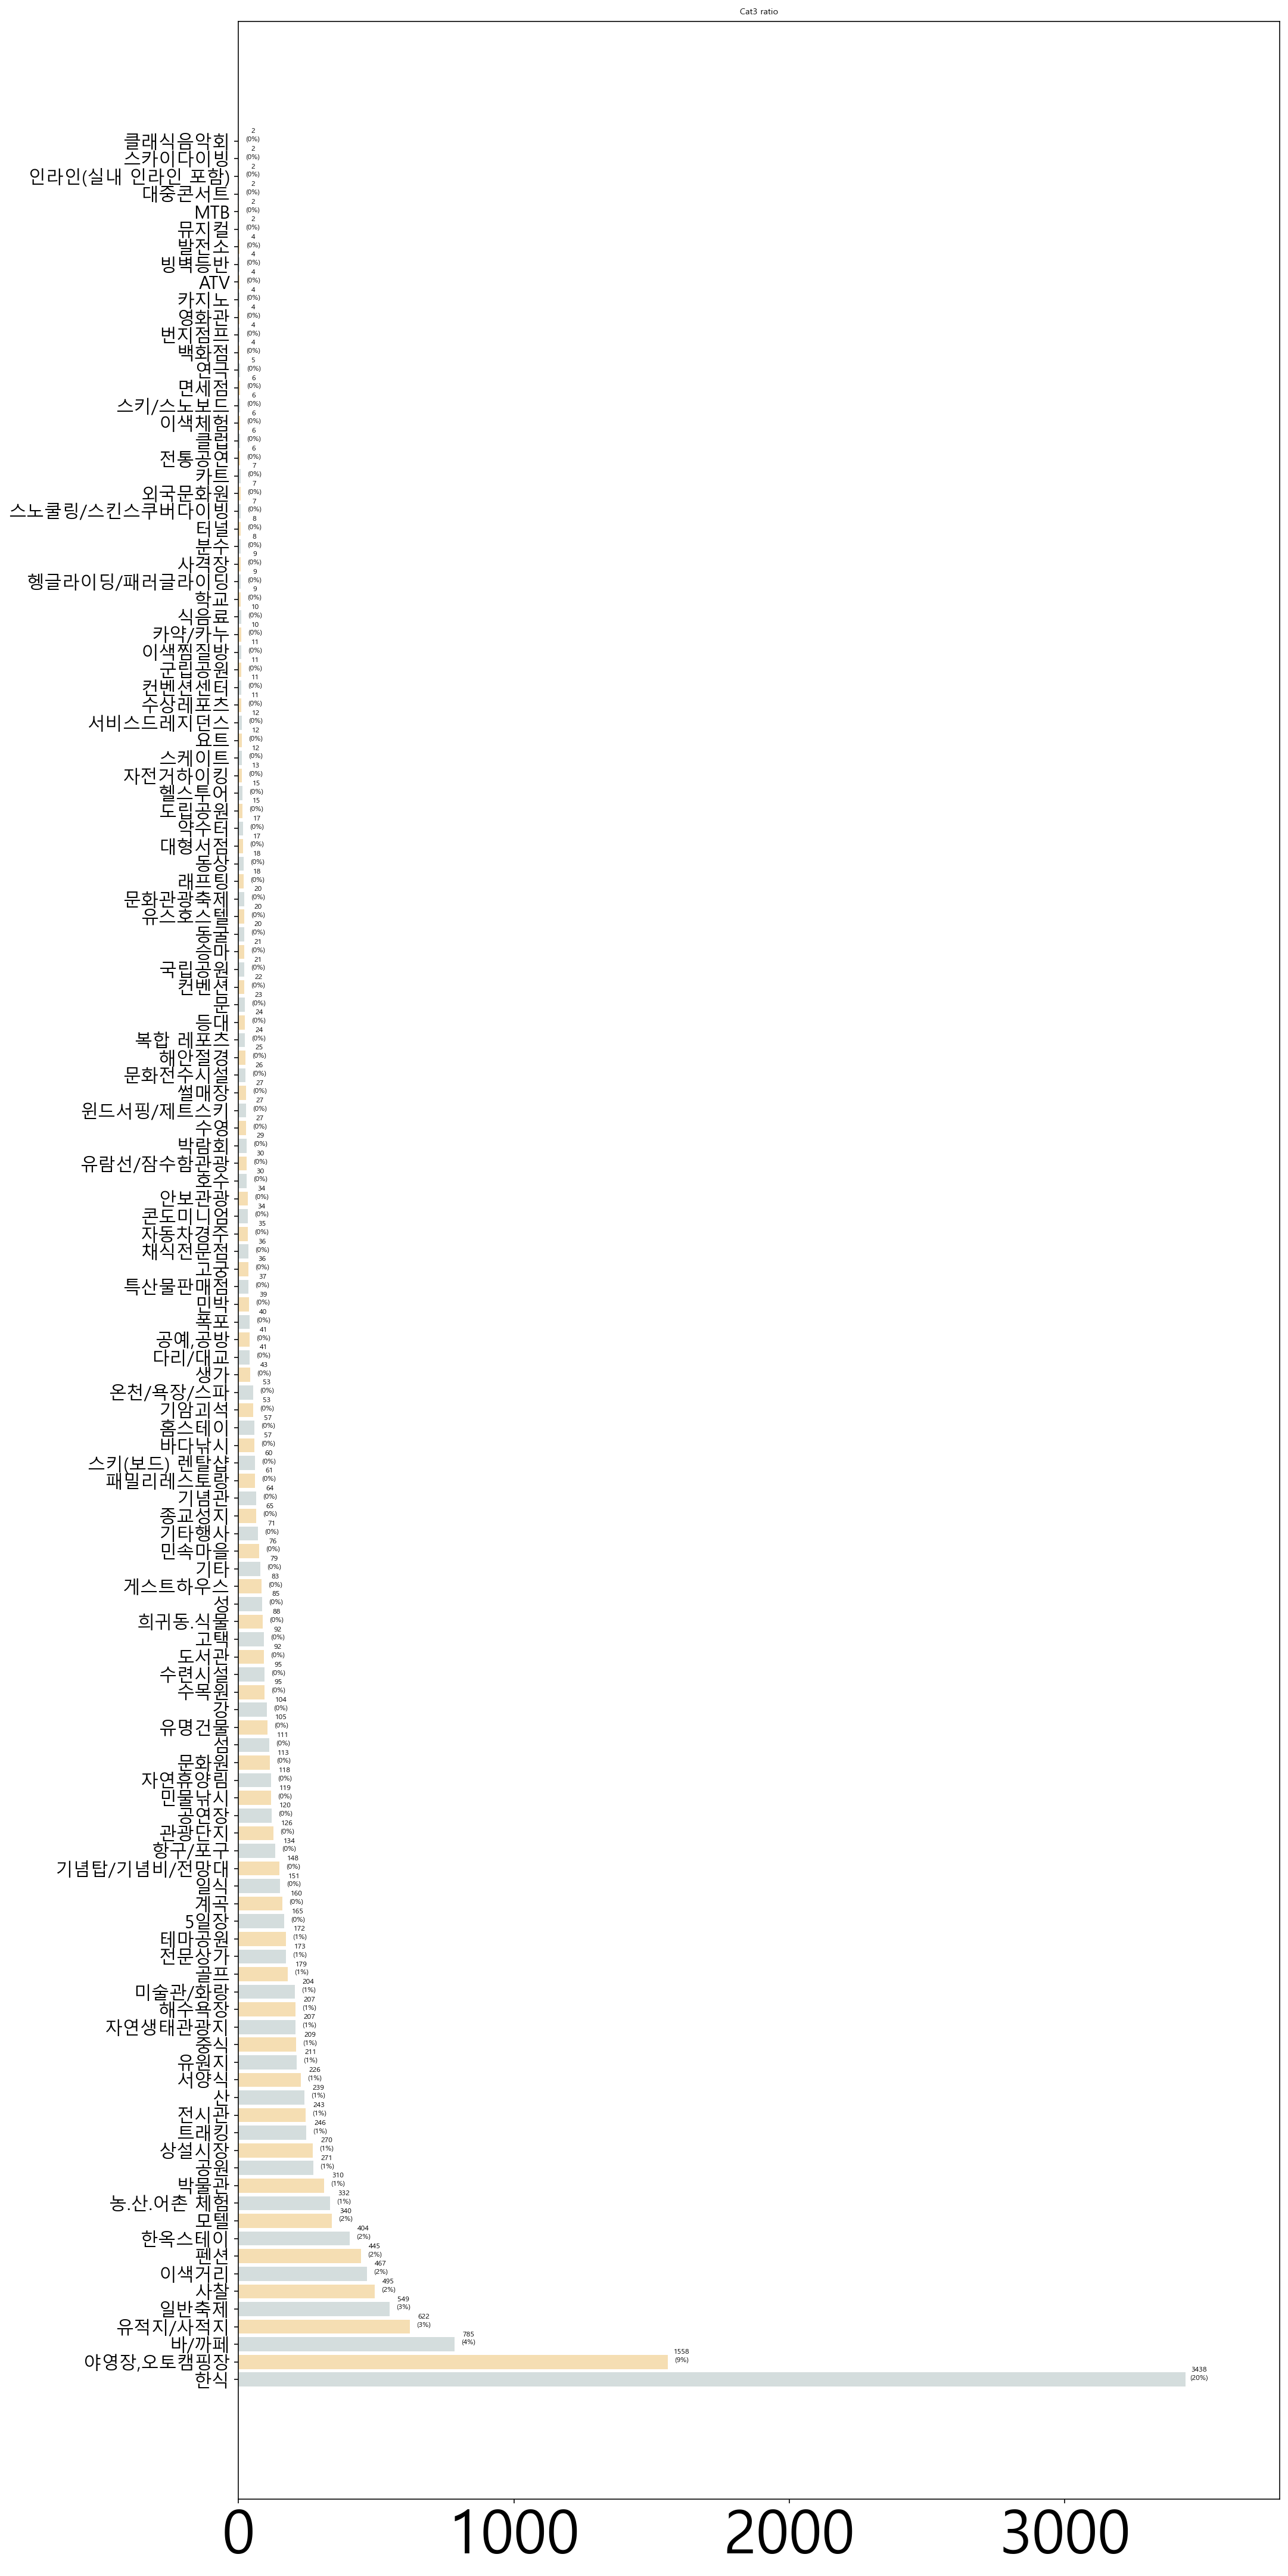

In [62]:
# cat3 분포 확인

f, axs = plt.subplots(1,figsize=(15,30))
object_cnt = df.cat3.value_counts().sort_values(ascending=False)
name_list = object_cnt.index.tolist()
plt.rc('font', size=6) 
axs.barh(name_list, object_cnt.values, color=['#d4dddd' if i%2==0 else '#F5DEB3' for i in range(len(name_list))])
for x,y,z in zip(range(len(name_list)), object_cnt.values,object_cnt.values/object_cnt.sum()*100):        
    axs.annotate('%d\n(%d%%)' %(int(y),z), xy=(y+50,x), textcoords='data', ha = 'center') 
axs.axis(xmin=0,xmax=int(max(object_cnt)*1.1))
axs.set_yticklabels(name_list, fontsize = 15) 
axs.set_title("Cat3 ratio")
f.tight_layout()
plt.show()

# Cat 3는 target 데이터로 128개의 클래스가 포함되며 매우 큰 클래스 불균형을 가지고 있다. 약 22%는 data 개수가 10개 미만이다.

## encoder decoder 저장

In [28]:
cat1toen = {k:v for k,v in zip(df.cat1.value_counts().index.to_list(), range(len(df.cat1.value_counts().index.to_list())))}
entocat1 = {v:k for k, v in cat1toen.items()}

cat2toen = {k:v for k,v in zip(df.cat2.value_counts().index.to_list(), range(len(df.cat2.value_counts().index.to_list())))}
entocat2 = {v:k for k, v in cat2toen.items()}

cat3toen = {k:v for k,v in zip(df.cat3.value_counts().index.to_list(), range(len(df.cat3.value_counts().index.to_list())))}
entocat3 = {v:k for k, v in cat3toen.items()}

In [33]:
cat1 = {
    "cat1toen":cat1toen,
    "entocat1":entocat1,
}
cat2 = {
    "cat2toen":cat2toen,
    "entocat2":entocat2,
}
cat3 = {
    "cat3toen":cat3toen,
    "entocat3":entocat3,
}

save_root = r'./endecoder'

with open(os.path.join(save_root, "cat1"), 'w') as outfile:
    json.dump(cat1, outfile)
    
with open(os.path.join(save_root, "cat2"), 'w') as outfile:
    json.dump(cat2, outfile)
    
with open(os.path.join(save_root, "cat3"), 'w') as outfile:
    json.dump(cat3, outfile)

## Image

In [4]:
from PIL import Image
import os
train_root = r'E:\관광'
img = Image.open(train_root + df.img_path[0][1:])

In [6]:
from torch.utils.data import DataLoader
from dataloader import Dataset, tensor2img

train_datset = Dataset(files=df, mode='train', label='cat1', img_size=224, pad=True)
trainloader = DataLoader(train_datset,
                batch_size = 16,
                shuffle = True,
                )

4


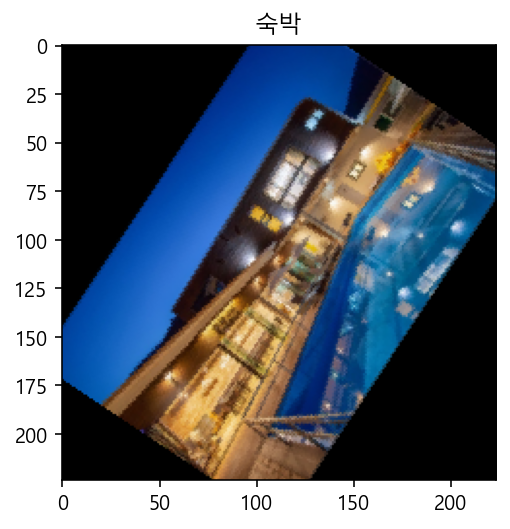

0


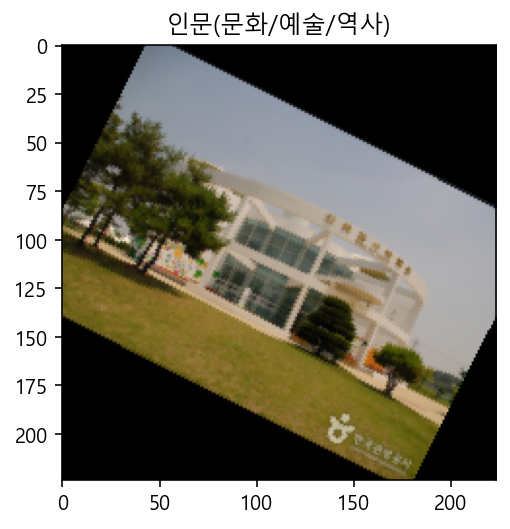

0


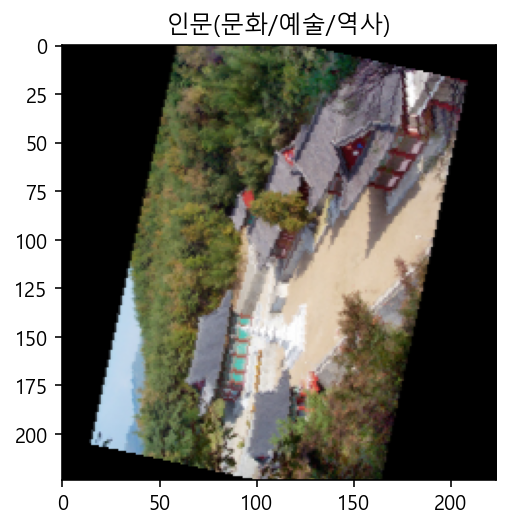

4


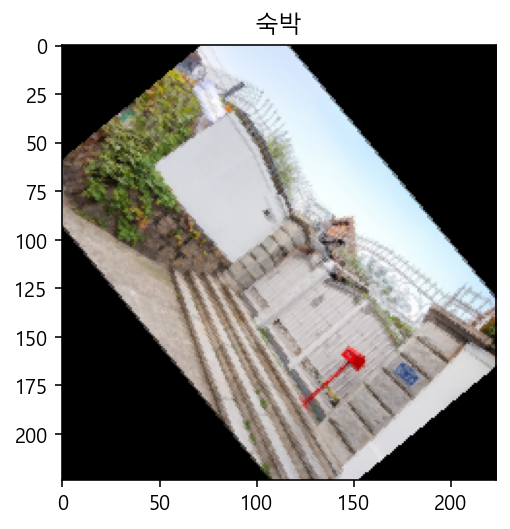

0


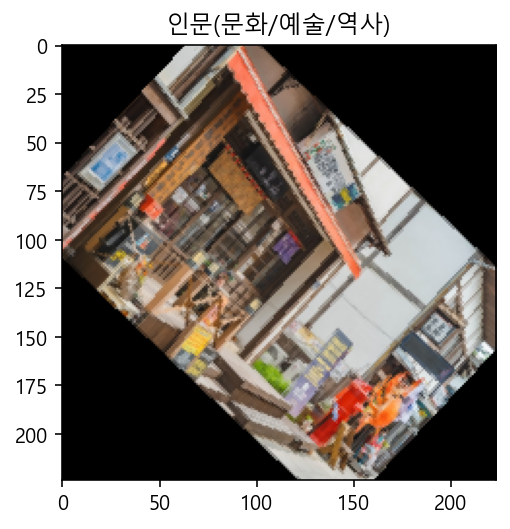

0


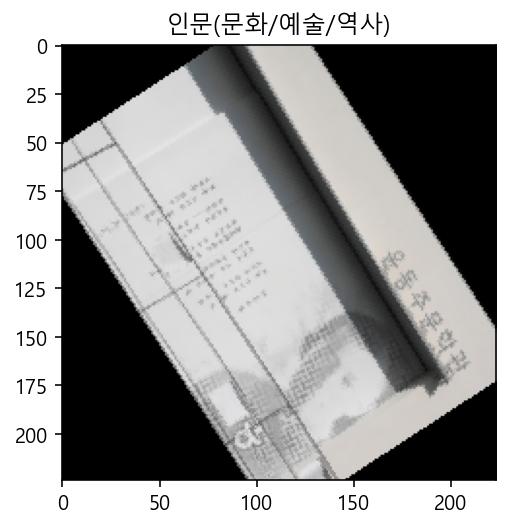

0


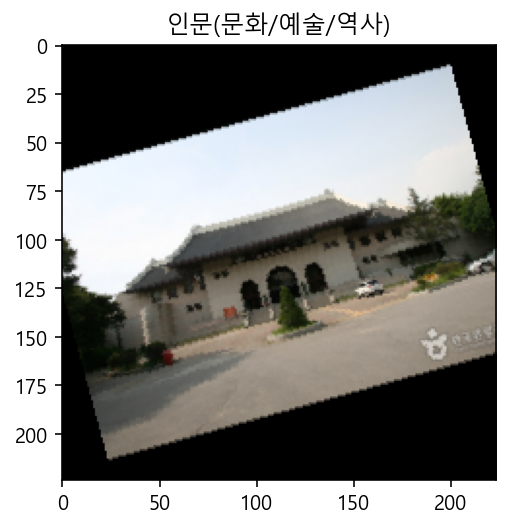

0


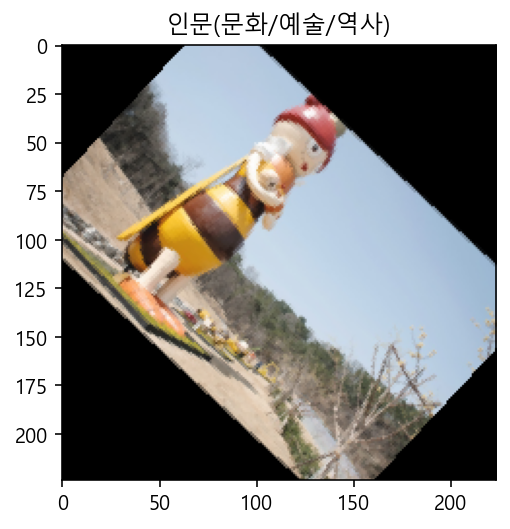

0


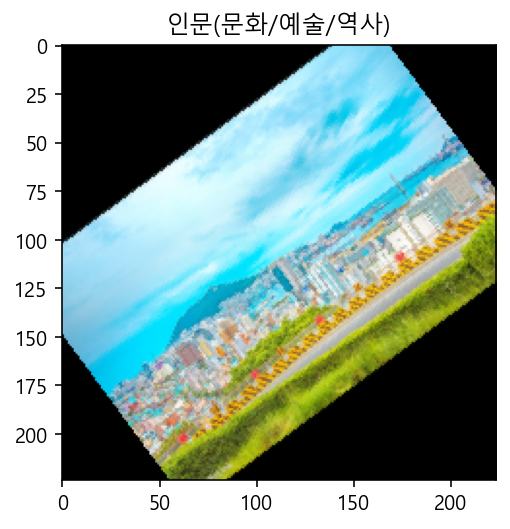

0


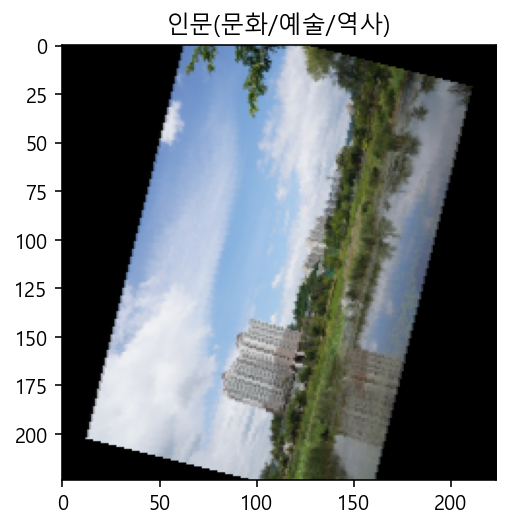

5


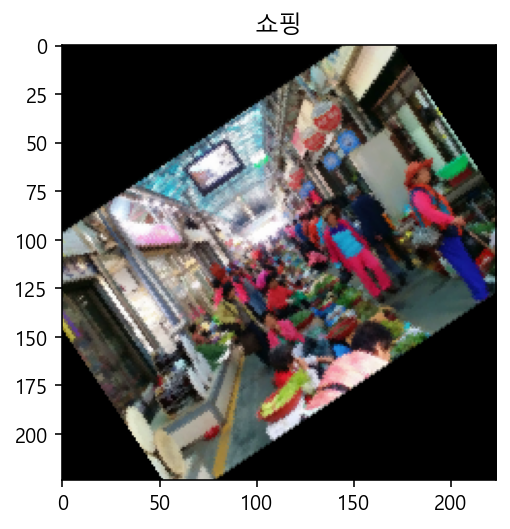

2


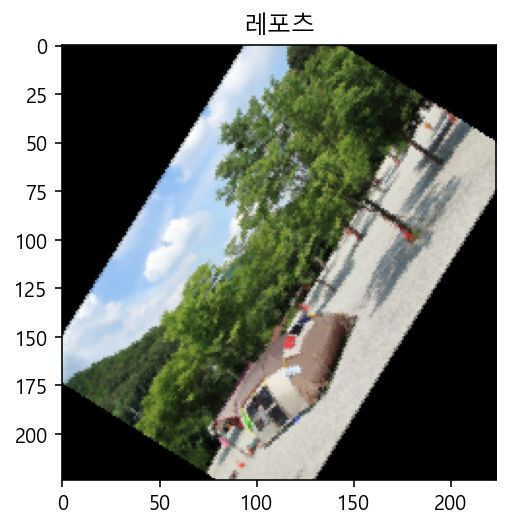

1


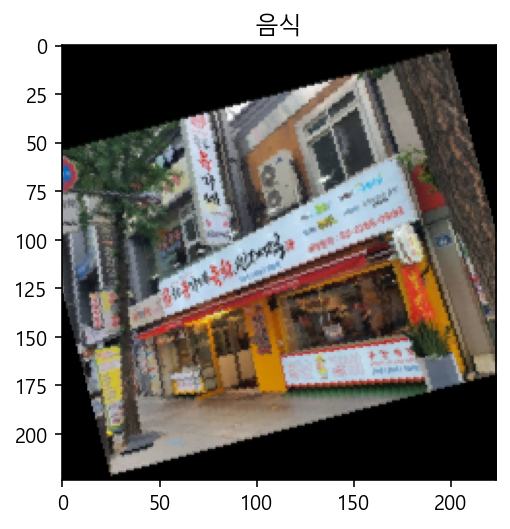

2


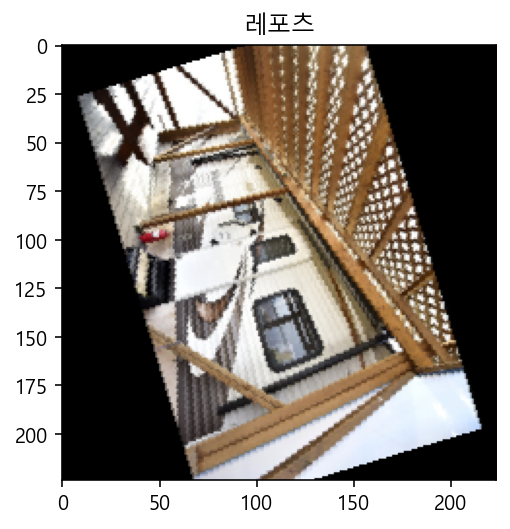

4


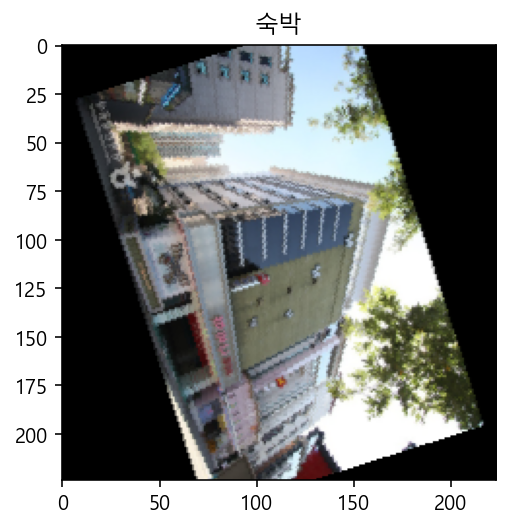

0


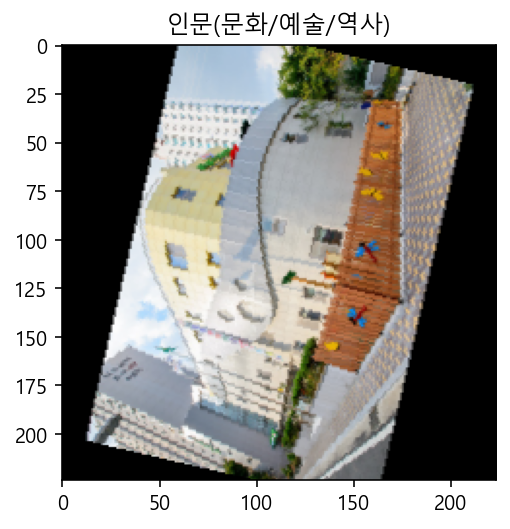

In [4]:
sample = next(iter(trainloader))
for img, label in zip(sample['image'],sample['labels']):
    plt.imshow(tensor2img(img))
    plt.title(train_datset.en2cat[str(label.numpy())])
    plt.show()